In [3]:
#importing libraries
import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
#loading dataset

crime_df_21 = pd.read_csv('Crime_Incidents_in_2021 (1).csv')
crime_df_20 = pd.read_csv('Crime_Incidents_in_2020 (1).csv')

frames = [crime_df_21,crime_df_20]
crime_df = pd.concat(frames)
#crime_df = crime_df.dropna()
crime_df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.016427,38.945357,20139232,2021/12/06 05:00:00+00,MIDNIGHT,GUN,HOMICIDE,300 - 399 BLOCK OF ALLISON STREET NW,398576.16,141939.53,...,002301 2,2301.0,Precinct 46,38.945349,-77.016425,NaN,2020/09/29 19:59:32+00,NaN,217939630,NaN
1,-77.068637,38.932083,11048862,2021/10/13 21:24:42+00,EVENING,OTHERS,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,394049.03,140468.17,...,000600 3,600.0,Precinct 27,38.932075,-77.068635,NaN,2021/10/13 14:00:00+00,2021/10/13 15:15:00+00,217945488,NaN
2,-76.926220,38.884377,10008883,2021/08/04 20:36:50+00,EVENING,OTHERS,THEFT/OTHER,300 - 348 BLOCK OF 53RD STREET SE,406401.56,135172.74,...,009905 1,9905.0,Precinct 105,38.884369,-76.926218,NaN,2021/07/16 16:00:00+00,2021/07/20 16:05:00+00,217949732,NaN
3,-76.989343,38.905932,11124202,2021/09/01 12:39:59+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,400924.55,137563.02,...,008802 3,8802.0,Precinct 77,38.905924,-76.989341,NaN,2021/09/01 01:36:00+00,NaN,217949735,NaN
4,-76.985593,38.912527,12113231,2021/08/12 12:00:17+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,401249.74,138295.18,...,008803 1,8803.0,Precinct 76,38.912520,-76.985590,NaN,2021/08/11 14:30:00+00,2021/08/12 04:00:00+00,217949736,NaN


In [26]:
crime_df['REPORT_DAT'] = pd.to_datetime(crime_df['REPORT_DAT'].astype(str), errors='coerce')
crime_df['REPORT_DAT'] = pd.to_datetime(crime_df['REPORT_DAT'], format = '%d/%m/%Y %H:%M:%S')

column_3 = crime_df['REPORT_DAT']
db=pd.DataFrame({"year": column_3.dt.year,
              "month": column_3.dt.month,
              "day": column_3.dt.day,
#               "dayofyear": column_1.dt.dayofyear,
#               "week": column_1.dt.week,
#               "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_3.dt.dayofweek,
#              "quarter": column_1.dt.quarter,
            })

dataset1=crime_df.drop('REPORT_DAT',axis=1)
data1=pd.concat([db,dataset1],axis=1)
data1

,year,month,day,dayofweek,X,Y,CCN,SHIFT,METHOD,OFFENSE,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,2021,12,6,0,-77.016427,38.945357,20139232,MIDNIGHT,GUN,HOMICIDE,...,002301 2,2301.0,Precinct 46,38.945349,-77.016425,NaN,2020/09/29 19:59:32+00,NaN,217939630,NaN
1,2021,10,13,2,-77.068637,38.932083,11048862,EVENING,OTHERS,THEFT F/AUTO,...,000600 3,600.0,Precinct 27,38.932075,-77.068635,NaN,2021/10/13 14:00:00+00,2021/10/13 15:15:00+00,217945488,NaN
2,2021,8,4,2,-76.926220,38.884377,10008883,EVENING,OTHERS,THEFT/OTHER,...,009905 1,9905.0,Precinct 105,38.884369,-76.926218,NaN,2021/07/16 16:00:00+00,2021/07/20 16:05:00+00,217949732,NaN
3,2021,9,1,2,-76.989343,38.905932,11124202,DAY,OTHERS,THEFT/OTHER,...,008802 3,8802.0,Precinct 77,38.905924,-76.989341,NaN,2021/09/01 01:36:00+00,NaN,217949735,NaN
4,2021,8,12,3,-76.985593,38.912527,12113231,DAY,OTHERS,THEFT/OTHER,...,008803 1,8803.0,Precinct 76,38.912520,-76.985590,NaN,2021/08/11 14:30:00+00,2021/08/12 04:00:00+00,217949736,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27907,2020,2,17,0,-76.990011,38.864388,20029087,DAY,OTHERS,THEFT F/AUTO,...,007503 1,7503.0,Precinct 114,38.864380,-76.990009,ANACOSTIA,2020/02/17 15:30:33+00,2020/02/17 15:35:02+00,218228304,NaN
27908,2020,2,17,0,-77.044243,38.923684,20029090,DAY,OTHERS,THEFT F/AUTO,...,003902 1,3902.0,Precinct 35,38.923676,-77.044240,NaN,2020/02/17 17:15:41+00,2020/02/17 18:11:28+00,218228305,NaN
27909,2020,2,17,0,-77.020912,38.900876,20029108,DAY,OTHERS,THEFT F/AUTO,...,005801 2,5801.0,Precinct 129,38.900868,-77.020910,DOWNTOWN,2020/02/17 17:00:54+00,2020/02/17 18:00:19+00,218228306,NaN
27910,2020,2,17,0,-77.025995,38.919865,20029109,EVENING,OTHERS,THEFT F/AUTO,...,004401 3,4401.0,Precinct 22,38.919857,-77.025993,NaN,2020/02/16 23:00:31+00,2020/02/17 18:52:35+00,218228307,NaN


In [29]:
data1.dtypes

year                      int64
month                     int64
day                       int64
dayofweek                 int64
X                       float64
Y                       float64
CCN                       int64
SHIFT                    object
METHOD                   object
OFFENSE                  object
BLOCK                    object
XBLOCK                  float64
YBLOCK                  float64
WARD                      int64
ANC                      object
DISTRICT                float64
PSA                     float64
NEIGHBORHOOD_CLUSTER     object
BLOCK_GROUP              object
CENSUS_TRACT            float64
VOTING_PRECINCT          object
LATITUDE                float64
LONGITUDE               float64
BID                      object
START_DATE               object
END_DATE                 object
OBJECTID                  int64
OCTO_RECORD_ID          float64
dtype: object

In [30]:
# Drop unnecessary crime columns for machine learning
data1 = data1.drop(['X','Y', 
                          'CCN','METHOD',
                          'XBLOCK','YBLOCK','ANC',
                          'BLOCK_GROUP','CENSUS_TRACT',
                          'BID','START_DATE','END_DATE',
                          'OBJECTID','OCTO_RECORD_ID'
                         ], axis=1)
data1.head()

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
0,2021,12,6,0,MIDNIGHT,HOMICIDE,300 - 399 BLOCK OF ALLISON STREET NW,4,4.0,407.0,Cluster 18,Precinct 46,38.945349,-77.016425
1,2021,10,13,2,EVENING,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
2,2021,8,4,2,EVENING,THEFT/OTHER,300 - 348 BLOCK OF 53RD STREET SE,7,6.0,604.0,Cluster 33,Precinct 105,38.884369,-76.926218
3,2021,9,1,2,DAY,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,8,12,3,DAY,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590


In [31]:
# count the number of rows that contain missing values:
data1.isna().any(axis=1).sum()

221

In [32]:
# droping the null values 
data1.dropna(inplace=True)

In [33]:
# counts after removal of null values from dataset
np.count_nonzero(data1.isnull())

0

In [34]:
data1

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
0,2021,12,6,0,MIDNIGHT,HOMICIDE,300 - 399 BLOCK OF ALLISON STREET NW,4,4.0,407.0,Cluster 18,Precinct 46,38.945349,-77.016425
1,2021,10,13,2,EVENING,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
2,2021,8,4,2,EVENING,THEFT/OTHER,300 - 348 BLOCK OF 53RD STREET SE,7,6.0,604.0,Cluster 33,Precinct 105,38.884369,-76.926218
3,2021,9,1,2,DAY,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,8,12,3,DAY,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27907,2020,2,17,0,DAY,THEFT F/AUTO,2200 - 2224 BLOCK OF MARTIN LUTHER KING JR AVE...,8,7.0,701.0,Cluster 28,Precinct 114,38.864380,-76.990009
27908,2020,2,17,0,DAY,THEFT F/AUTO,2600 - 2699 BLOCK OF ADAMS MILL ROAD NW,1,3.0,303.0,Cluster 1,Precinct 35,38.923676,-77.044240
27909,2020,2,17,0,DAY,THEFT F/AUTO,600 - 699 BLOCK OF I STREET NW,2,1.0,101.0,Cluster 8,Precinct 129,38.900868,-77.020910
27910,2020,2,17,0,EVENING,THEFT F/AUTO,2201 - 2299 BLOCK OF 10TH STREET NW,1,3.0,305.0,Cluster 3,Precinct 22,38.919857,-77.025993


In [35]:
coordinates = data1[['LATITUDE', 'LONGITUDE']]
lats = data1['LATITUDE']
lngs = data1['LONGITUDE']
#CREATE ZIP AND CONCATENATE COORDINATES
lat_lngs = zip(lats, lngs)
lat_lngs
#PRINT COORDINATES TO ENSURE THEY LOOK AS EXPECTED
coordinates = list(lat_lngs)
print (coordinates)

[(38.9453487923, -77.0164247437), (38.9320753503, -77.0686347977), (38.884369139, -76.926217741), (38.9059244747, -76.989340724), (38.9125196212, -76.9855902272), (38.9025140153, -77.03410505560001), (38.93508435, -76.9691499079), (38.9053660251, -76.9963229216), (38.9078254892, -77.0035141787), (38.879813272, -76.98677398859999), (38.9191858993, -77.0332840438), (38.9348242806, -77.0580805327), (38.8897507796, -76.9190589195), (38.9312504756, -77.0354064875), (38.8300815919, -76.9961765738), (38.861177679899995, -76.98396603270001), (38.862414457199996, -76.99179360699999), (38.9208434707, -77.03184982970001), (38.921623045, -77.0423654641), (38.9565875344, -77.0126313162), (38.928171804, -77.0325902763), (38.914080723000005, -77.0106024967), (38.8565493593, -76.978022206), (38.889241005, -76.99496317), (38.9268556038, -77.0731878939), (38.9818442782, -77.0377949683), (38.892014251300004, -77.0000384999), (38.9500980115, -77.00680652930001), (38.9041715399, -77.0265136276), (38.979395

In [36]:
print('Current rows:', data1.shape[0])
data1 = data1[(((data1.LATITUDE >= 38.90) & (data1.LONGITUDE <= -76.80)) | 
            ((data1.LATITUDE <= 38.90) & (data1.LONGITUDE >= -76.80)))]
print('Rows after removing out of box points:', data1.shape[0])

Current rows: 56012
Rows after removing out of box points: 37729


In [55]:
dataFrame = data1.copy()

In [56]:
data = dataFrame.pivot_table(index='year', columns='OFFENSE', aggfunc='count')
print(data)

        BLOCK                                               \
OFFENSE ARSON ASSAULT W/DANGEROUS WEAPON BURGLARY HOMICIDE   
year                                                         
2020      9.0                      724.0    996.0     77.0   
2021      2.0                      783.0    817.0     75.0   
2022      NaN                        NaN      NaN      NaN   

                                                                        \
OFFENSE MOTOR VEHICLE THEFT ROBBERY SEX ABUSE THEFT F/AUTO THEFT/OTHER   
year                                                                     
2020                 2018.0  1087.0      91.0       5822.0      7623.0   
2021                 2189.0  1116.0      97.0       6507.0      7687.0   
2022                    3.0     4.0       NaN          2.0         NaN   

        DISTRICT  ...   dayofweek month                                      \
OFFENSE    ARSON  ... THEFT/OTHER ARSON ASSAULT W/DANGEROUS WEAPON BURGLARY   
year              ...   

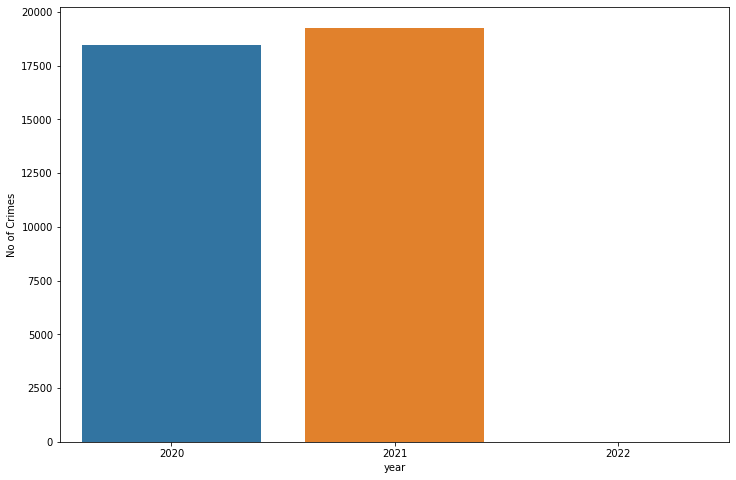

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(x='year',data=dataFrame)
plt.ylabel('No of Crimes')
plt.show()

In [58]:
# Since we do not have crimes data for 2022 drop it
dataFrame=dataFrame[dataFrame['year']>=2020]
dataFrame=dataFrame[dataFrame['year']<2022]
dataFrame

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
0,2021,12,6,0,MIDNIGHT,HOMICIDE,300 - 399 BLOCK OF ALLISON STREET NW,4,4.0,407.0,Cluster 18,Precinct 46,38.945349,-77.016425
1,2021,10,13,2,EVENING,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
3,2021,9,1,2,DAY,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,8,12,3,DAY,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
5,2021,10,21,3,MIDNIGHT,THEFT F/AUTO,1434 - 1499 BLOCK OF K STREET NW,2,2.0,207.0,Cluster 8,Precinct 129,38.902514,-77.034105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27905,2020,2,13,3,MIDNIGHT,THEFT F/AUTO,700 - 799 BLOCK OF BUCHANAN STREET NE,5,4.0,405.0,Cluster 20,Precinct 67,38.946271,-76.996002
27908,2020,2,17,0,DAY,THEFT F/AUTO,2600 - 2699 BLOCK OF ADAMS MILL ROAD NW,1,3.0,303.0,Cluster 1,Precinct 35,38.923676,-77.044240
27909,2020,2,17,0,DAY,THEFT F/AUTO,600 - 699 BLOCK OF I STREET NW,2,1.0,101.0,Cluster 8,Precinct 129,38.900868,-77.020910
27910,2020,2,17,0,EVENING,THEFT F/AUTO,2201 - 2299 BLOCK OF 10TH STREET NW,1,3.0,305.0,Cluster 3,Precinct 22,38.919857,-77.025993


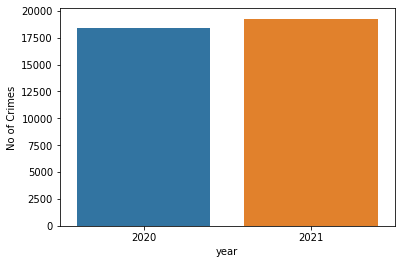

In [59]:
sns.countplot(x='year',data=dataFrame)
plt.ylabel('No of Crimes')
plt.show()

In [60]:
# # listing the crimes type wise with their counts
types=dataFrame['OFFENSE'].value_counts().sort_values(ascending=False)
types

THEFT/OTHER                   15310
THEFT F/AUTO                  12329
MOTOR VEHICLE THEFT            4207
ROBBERY                        2203
BURGLARY                       1813
ASSAULT W/DANGEROUS WEAPON     1507
SEX ABUSE                       188
HOMICIDE                        152
ARSON                            11
Name: OFFENSE, dtype: int64

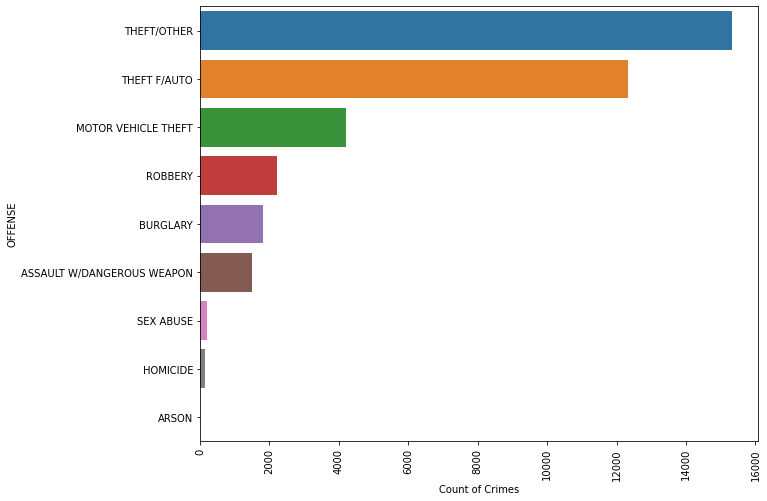

In [61]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataFrame, y="OFFENSE", order=dataFrame['OFFENSE'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Count of Crimes')
plt.show()

In [62]:
fourMajorTypes=dataFrame['OFFENSE'].value_counts().sort_values(ascending=False)
fourMajorTypes=fourMajorTypes[:4]
fourMajorTypes

THEFT/OTHER            15310
THEFT F/AUTO           12329
MOTOR VEHICLE THEFT     4207
ROBBERY                 2203
Name: OFFENSE, dtype: int64

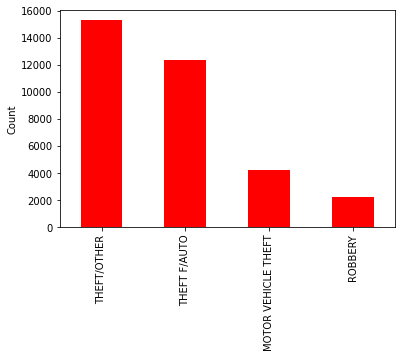

In [85]:
#TOP 4 CRIMES
fourMajorTypes.plot(kind='bar',color='red')
plt.ylabel('Count')
plt.show()

In [86]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT/OTHER','THEFT F/AUTO','MOTOR VEHICLE THEFT','ROBBERY']

In [87]:
# selecting the data form our dataset that belongs major crime classes
major_crime_df = dataFrame.loc[dataFrame['OFFENSE'] .isin(major_crimes)]
major_crime_df

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
1,2021,10,13,2,EVENING,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
3,2021,9,1,2,DAY,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,8,12,3,DAY,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
5,2021,10,21,3,MIDNIGHT,THEFT F/AUTO,1434 - 1499 BLOCK OF K STREET NW,2,2.0,207.0,Cluster 8,Precinct 129,38.902514,-77.034105
6,2021,4,23,4,DAY,THEFT F/AUTO,2600 - 2799 BLOCK OF OTIS STREET NE,5,5.0,503.0,Cluster 24,Precinct 69,38.935084,-76.969150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27905,2020,2,13,3,MIDNIGHT,THEFT F/AUTO,700 - 799 BLOCK OF BUCHANAN STREET NE,5,4.0,405.0,Cluster 20,Precinct 67,38.946271,-76.996002
27908,2020,2,17,0,DAY,THEFT F/AUTO,2600 - 2699 BLOCK OF ADAMS MILL ROAD NW,1,3.0,303.0,Cluster 1,Precinct 35,38.923676,-77.044240
27909,2020,2,17,0,DAY,THEFT F/AUTO,600 - 699 BLOCK OF I STREET NW,2,1.0,101.0,Cluster 8,Precinct 129,38.900868,-77.020910
27910,2020,2,17,0,EVENING,THEFT F/AUTO,2201 - 2299 BLOCK OF 10TH STREET NW,1,3.0,305.0,Cluster 3,Precinct 22,38.919857,-77.025993


In [88]:
loc=major_crime_df['DISTRICT'].value_counts().sort_values(ascending=False)
#loc=loc[:9]
loc

3.0    9622
2.0    8132
5.0    6975
4.0    6516
1.0    1772
6.0    1032
Name: DISTRICT, dtype: int64

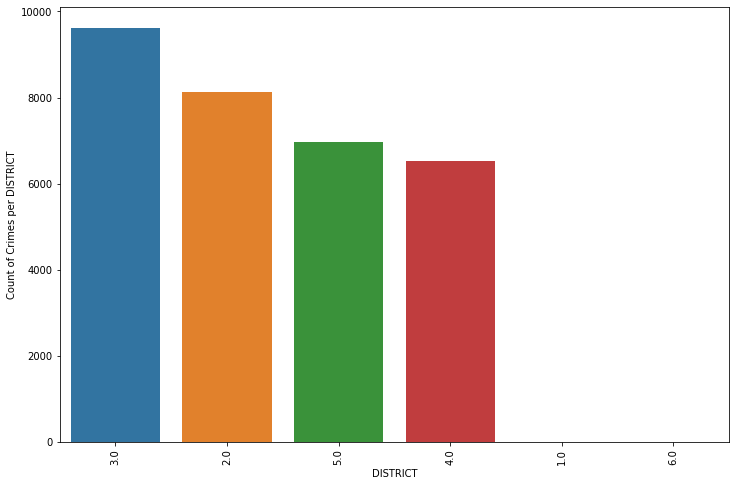

In [89]:
plt.figure(figsize=(12,8))
sns.countplot(data=crime_df, x="DISTRICT", order=loc.index)
plt.xticks(rotation='vertical')
plt.ylabel('Count of Crimes per DISTRICT')
plt.show()

In [90]:
# storing four major 4 locations
major_loc = ['3.0','2.0', '5.0','4.0']

In [91]:
# selecting the data form our dataset that belongs major locations
crime_df = crime_df.loc[crime_df['DISTRICT'] .isin(major_loc)]
crime_df

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
1,2021,10,13,2,EVENING,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
3,2021,9,1,2,DAY,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,8,12,3,DAY,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
5,2021,10,21,3,MIDNIGHT,THEFT F/AUTO,1434 - 1499 BLOCK OF K STREET NW,2,2.0,207.0,Cluster 8,Precinct 129,38.902514,-77.034105
6,2021,4,23,4,DAY,THEFT F/AUTO,2600 - 2799 BLOCK OF OTIS STREET NE,5,5.0,503.0,Cluster 24,Precinct 69,38.935084,-76.969150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27904,2020,2,13,3,MIDNIGHT,THEFT F/AUTO,800 - 899 BLOCK OF 25TH STREET NW,2,2.0,207.0,Cluster 5,Precinct 3,38.900181,-77.053316
27905,2020,2,13,3,MIDNIGHT,THEFT F/AUTO,700 - 799 BLOCK OF BUCHANAN STREET NE,5,4.0,405.0,Cluster 20,Precinct 67,38.946271,-76.996002
27908,2020,2,17,0,DAY,THEFT F/AUTO,2600 - 2699 BLOCK OF ADAMS MILL ROAD NW,1,3.0,303.0,Cluster 1,Precinct 35,38.923676,-77.044240
27910,2020,2,17,0,EVENING,THEFT F/AUTO,2201 - 2299 BLOCK OF 10TH STREET NW,1,3.0,305.0,Cluster 3,Precinct 22,38.919857,-77.025993


In [97]:
graphDF=crime_df.copy()
graphDF

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
1,2021,10,13,2,EVENING,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
3,2021,9,1,2,DAY,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,8,12,3,DAY,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
5,2021,10,21,3,MIDNIGHT,THEFT F/AUTO,1434 - 1499 BLOCK OF K STREET NW,2,2.0,207.0,Cluster 8,Precinct 129,38.902514,-77.034105
6,2021,4,23,4,DAY,THEFT F/AUTO,2600 - 2799 BLOCK OF OTIS STREET NE,5,5.0,503.0,Cluster 24,Precinct 69,38.935084,-76.969150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27904,2020,2,13,3,MIDNIGHT,THEFT F/AUTO,800 - 899 BLOCK OF 25TH STREET NW,2,2.0,207.0,Cluster 5,Precinct 3,38.900181,-77.053316
27905,2020,2,13,3,MIDNIGHT,THEFT F/AUTO,700 - 799 BLOCK OF BUCHANAN STREET NE,5,4.0,405.0,Cluster 20,Precinct 67,38.946271,-76.996002
27908,2020,2,17,0,DAY,THEFT F/AUTO,2600 - 2699 BLOCK OF ADAMS MILL ROAD NW,1,3.0,303.0,Cluster 1,Precinct 35,38.923676,-77.044240
27910,2020,2,17,0,EVENING,THEFT F/AUTO,2201 - 2299 BLOCK OF 10TH STREET NW,1,3.0,305.0,Cluster 3,Precinct 22,38.919857,-77.025993


In [98]:
graphDF['month'] = pd.to_datetime(graphDF['month'],format='%m')

In [99]:
import calendar
graphDF['month']=(graphDF['month'].dt.month).apply(lambda x: calendar.month_abbr[x])
graphDF.head(4)

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
1,2021,Oct,13,2,EVENING,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
3,2021,Sep,1,2,DAY,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,Aug,12,3,DAY,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
5,2021,Oct,21,3,MIDNIGHT,THEFT F/AUTO,1434 - 1499 BLOCK OF K STREET NW,2,2.0,207.0,Cluster 8,Precinct 129,38.902514,-77.034105


In [100]:
# storing the categories of months

graphDF['month'] = pd.Categorical(graphDF['month'] , categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

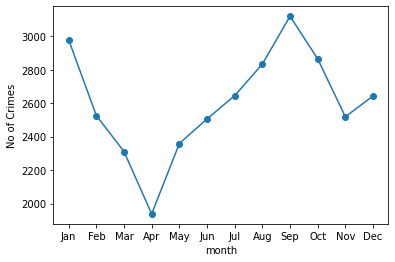

In [102]:
import numpy as np
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
graphDF.groupby('month')['year'].count().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

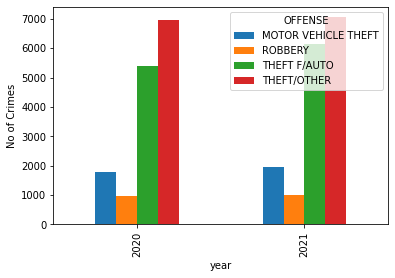

In [103]:
graphDF.groupby(['year','OFFENSE'])['year'].count().unstack().plot(kind='bar')
plt.ylabel('No of Crimes')
plt.show()

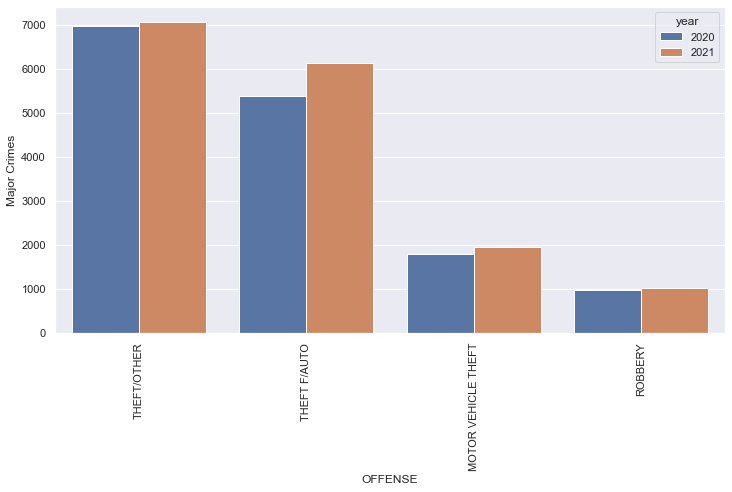

In [194]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='OFFENSE',hue='year',data=graphDF,order=graphDF['OFFENSE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('Major Crimes')
plt.show()

In [111]:
temp=graphDF.copy()
temp

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
1,2021,Oct,13,2,EVENING,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
3,2021,Sep,1,2,DAY,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,Aug,12,3,DAY,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
5,2021,Oct,21,3,MIDNIGHT,THEFT F/AUTO,1434 - 1499 BLOCK OF K STREET NW,2,2.0,207.0,Cluster 8,Precinct 129,38.902514,-77.034105
6,2021,Apr,23,4,DAY,THEFT F/AUTO,2600 - 2799 BLOCK OF OTIS STREET NE,5,5.0,503.0,Cluster 24,Precinct 69,38.935084,-76.969150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27904,2020,Feb,13,3,MIDNIGHT,THEFT F/AUTO,800 - 899 BLOCK OF 25TH STREET NW,2,2.0,207.0,Cluster 5,Precinct 3,38.900181,-77.053316
27905,2020,Feb,13,3,MIDNIGHT,THEFT F/AUTO,700 - 799 BLOCK OF BUCHANAN STREET NE,5,4.0,405.0,Cluster 20,Precinct 67,38.946271,-76.996002
27908,2020,Feb,17,0,DAY,THEFT F/AUTO,2600 - 2699 BLOCK OF ADAMS MILL ROAD NW,1,3.0,303.0,Cluster 1,Precinct 35,38.923676,-77.044240
27910,2020,Feb,17,0,EVENING,THEFT F/AUTO,2201 - 2299 BLOCK OF 10TH STREET NW,1,3.0,305.0,Cluster 3,Precinct 22,38.919857,-77.025993


In [112]:
def OFFENSE(t):
    if t =='THEFT/OTHER': return '0'
    elif t =='THEFT F/AUTO': return '1'
    elif t =='MOTOR VEHICLE THEFT': return '2'
    elif t == 'ROBBERY': return '3'
    else: return '-1'

# cp_crime = crime_df.copy()
temp['OFFENSE'] = temp['OFFENSE'].map(OFFENSE)
#temp=temp.drop(columns='OFFENSE')
temp

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
1,2021,Oct,13,2,EVENING,1,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
3,2021,Sep,1,2,DAY,0,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,Aug,12,3,DAY,0,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
5,2021,Oct,21,3,MIDNIGHT,1,1434 - 1499 BLOCK OF K STREET NW,2,2.0,207.0,Cluster 8,Precinct 129,38.902514,-77.034105
6,2021,Apr,23,4,DAY,1,2600 - 2799 BLOCK OF OTIS STREET NE,5,5.0,503.0,Cluster 24,Precinct 69,38.935084,-76.969150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27904,2020,Feb,13,3,MIDNIGHT,1,800 - 899 BLOCK OF 25TH STREET NW,2,2.0,207.0,Cluster 5,Precinct 3,38.900181,-77.053316
27905,2020,Feb,13,3,MIDNIGHT,1,700 - 799 BLOCK OF BUCHANAN STREET NE,5,4.0,405.0,Cluster 20,Precinct 67,38.946271,-76.996002
27908,2020,Feb,17,0,DAY,1,2600 - 2699 BLOCK OF ADAMS MILL ROAD NW,1,3.0,303.0,Cluster 1,Precinct 35,38.923676,-77.044240
27910,2020,Feb,17,0,EVENING,1,2201 - 2299 BLOCK OF 10TH STREET NW,1,3.0,305.0,Cluster 3,Precinct 22,38.919857,-77.025993


In [113]:
# temp.dropna()
temp.dropna(inplace=True)
temp

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
1,2021,Oct,13,2,EVENING,1,3100 - 3199 BLOCK OF 35TH STREET NW,3,2.0,204.0,Cluster 15,Precinct 27,38.932075,-77.068635
3,2021,Sep,1,2,DAY,0,1100 - 1199 BLOCK OF OATES STREET NE,5,5.0,506.0,Cluster 23,Precinct 77,38.905924,-76.989341
4,2021,Aug,12,3,DAY,0,1800 - 1899 BLOCK OF CENTRAL PLACE NE,5,5.0,506.0,Cluster 23,Precinct 76,38.912520,-76.985590
5,2021,Oct,21,3,MIDNIGHT,1,1434 - 1499 BLOCK OF K STREET NW,2,2.0,207.0,Cluster 8,Precinct 129,38.902514,-77.034105
6,2021,Apr,23,4,DAY,1,2600 - 2799 BLOCK OF OTIS STREET NE,5,5.0,503.0,Cluster 24,Precinct 69,38.935084,-76.969150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27904,2020,Feb,13,3,MIDNIGHT,1,800 - 899 BLOCK OF 25TH STREET NW,2,2.0,207.0,Cluster 5,Precinct 3,38.900181,-77.053316
27905,2020,Feb,13,3,MIDNIGHT,1,700 - 799 BLOCK OF BUCHANAN STREET NE,5,4.0,405.0,Cluster 20,Precinct 67,38.946271,-76.996002
27908,2020,Feb,17,0,DAY,1,2600 - 2699 BLOCK OF ADAMS MILL ROAD NW,1,3.0,303.0,Cluster 1,Precinct 35,38.923676,-77.044240
27910,2020,Feb,17,0,EVENING,1,2201 - 2299 BLOCK OF 10TH STREET NW,1,3.0,305.0,Cluster 3,Precinct 22,38.919857,-77.025993


In [114]:
# count of null values
temp.isna().any(axis=1).sum()

0

In [115]:
# values according to their class count
count=temp['OFFENSE'].value_counts().sort_values(ascending=False)
count

0    14020
1    11513
2     3732
3     1980
Name: OFFENSE, dtype: int64

In [116]:
# getting the portion of our data set for random data selection
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

10415

In [117]:
first=temp.iloc[0:portion,:]
first.shape

(10415, 14)

In [118]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(10415, 14)

In [124]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape

(10413, 14)

In [125]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,replace=False,size = 3000)
df_frst=first.iloc[index]
df_frst.shape

(3000, 14)

In [126]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,replace=False,size = 3000)
df_scnd=scnd.iloc[index]
df_scnd

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
22601,2021,Aug,7,5,EVENING,1,1500 - 1599 BLOCK OF 7TH STREET NW,2,3.0,307.0,Cluster 7,Precinct 18,38.910384,-77.021917
3302,2020,Mar,7,5,DAY,0,3500 - 3599 BLOCK OF CONNECTICUT AVENUE NW,3,2.0,203.0,Cluster 15,Precinct 34,38.936195,-77.058877
2078,2020,Feb,15,5,EVENING,0,4227 - 4399 BLOCK OF CONNECTICUT AVENUE NW,3,2.0,203.0,Cluster 12,Precinct 34,38.944869,-77.063916
3708,2020,Mar,9,0,EVENING,1,5300 - 5399 BLOCK OF 9TH STREET NW,4,4.0,403.0,Cluster 18,Precinct 56,38.954672,-77.025681
5052,2020,Apr,22,2,DAY,1,4300 - 4399 BLOCK OF 18TH STREET NW,4,4.0,404.0,Cluster 18,Precinct 48,38.943472,-77.041273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,2020,May,24,6,EVENING,0,500 - 599 BLOCK OF FLORIDA AVENUE NE,5,5.0,501.0,Cluster 23,Precinct 76,38.906468,-76.998884
8603,2020,Aug,28,4,EVENING,0,900 - 999 BLOCK OF FRENCH STREET NW,2,3.0,307.0,Cluster 7,Precinct 21,38.913339,-77.024981
5135,2020,Apr,11,5,DAY,0,1502 - 1599 BLOCK OF WEST VIRGINIA AVENUE NE,5,5.0,506.0,Cluster 23,Precinct 77,38.907604,-76.989028
25624,2021,Oct,31,6,MIDNIGHT,2,3200 - 3299 BLOCK OF 13TH STREET NW,1,3.0,302.0,Cluster 2,Precinct 39,38.930177,-77.029709


In [127]:
# picking random 5k enteries from the third half

index=np.random.choice(portion,replace=False,size = 3000)
df_third=third.iloc[index]
df_third

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
10805,2020,Nov,15,6,EVENING,2,200 - 299 BLOCK OF K STREET NE,6,5.0,501.0,Cluster 25,Precinct 144,38.902515,-77.002803
18155,2020,Mar,14,5,MIDNIGHT,0,1600 - 1699 BLOCK OF KALORAMA ROAD NW,1,3.0,303.0,Cluster 1,Precinct 24,38.922049,-77.037694
14012,2020,Jun,30,1,EVENING,0,1 - 1299 BLOCK OF BLAGDEN ALLEY NW,2,3.0,307.0,Cluster 7,Precinct 129,38.906846,-77.024986
11760,2020,Aug,24,0,EVENING,1,900 - 1080 BLOCK OF MOUNT OLIVET ROAD NE,5,5.0,506.0,Cluster 23,Precinct 76,38.911775,-76.988871
9051,2020,Sep,15,1,EVENING,1,4400 - 4498 BLOCK OF 19TH PLACE NE,5,5.0,503.0,Cluster 20,Precinct 69,38.943549,-76.977280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11804,2020,Sep,10,3,EVENING,2,1151 - 1199 BLOCK OF 1ST STREET NE,6,5.0,501.0,Cluster 25,Precinct 144,38.905164,-77.005885
12527,2020,Aug,16,6,DAY,1,100 - 299 BLOCK OF BATES STREET NW,5,3.0,308.0,Cluster 21,Precinct 19,38.910381,-77.013672
18577,2020,May,5,1,DAY,1,1100 - 1299 BLOCK OF BUCHANAN STREET NW,4,4.0,404.0,Cluster 18,Precinct 48,38.946123,-77.028122
11000,2020,Sep,9,2,DAY,1,1800 - 1849 BLOCK OF PLYMOUTH STREET NW,4,4.0,401.0,Cluster 16,Precinct 62,38.985817,-77.043668


In [128]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE
0,2021,Feb,15,0,EVENING,0,1100 - 1199 BLOCK OF VERMONT AVENUE NW,2,2.0,207.0,Cluster 8,Precinct 17,38.904526,-77.032614
1,2021,Mar,31,2,EVENING,0,1619 - 1699 BLOCK OF 17TH STREET NW,2,3.0,307.0,Cluster 6,Precinct 15,38.912240,-77.038483
2,2021,Jan,26,1,DAY,3,1400 - 1599 BLOCK OF SOMERSET PLACE NW,4,4.0,402.0,Cluster 17,Precinct 60,38.966849,-77.034901
3,2021,May,30,6,DAY,1,6900 - 6999 BLOCK OF WILLOW STREET NW,4,4.0,401.0,Cluster 17,Precinct 63,38.973540,-77.014592
4,2021,May,31,0,DAY,1,1320 - 1399 BLOCK OF 15TH STREET NW,2,2.0,208.0,Cluster 7,Precinct 16,38.908318,-77.034562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2020,Sep,10,3,EVENING,2,1151 - 1199 BLOCK OF 1ST STREET NE,6,5.0,501.0,Cluster 25,Precinct 144,38.905164,-77.005885
8996,2020,Aug,16,6,DAY,1,100 - 299 BLOCK OF BATES STREET NW,5,3.0,308.0,Cluster 21,Precinct 19,38.910381,-77.013672
8997,2020,May,5,1,DAY,1,1100 - 1299 BLOCK OF BUCHANAN STREET NW,4,4.0,404.0,Cluster 18,Precinct 48,38.946123,-77.028122
8998,2020,Sep,9,2,DAY,1,1800 - 1849 BLOCK OF PLYMOUTH STREET NW,4,4.0,401.0,Cluster 16,Precinct 62,38.985817,-77.043668


In [129]:
df=final_df.copy()

In [130]:
# Using PCA to combine two features

from sklearn.decomposition import PCA

location = df[['LATITUDE','LONGITUDE']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE,Location
0,2021,Feb,15,0,EVENING,0,1100 - 1199 BLOCK OF VERMONT AVENUE NW,2,2.0,207.0,Cluster 8,Precinct 17,38.904526,-77.032614,0.003961
1,2021,Mar,31,2,EVENING,0,1619 - 1699 BLOCK OF 17TH STREET NW,2,3.0,307.0,Cluster 6,Precinct 15,38.912240,-77.038483,0.010910
2,2021,Jan,26,1,DAY,3,1400 - 1599 BLOCK OF SOMERSET PLACE NW,4,4.0,402.0,Cluster 17,Precinct 60,38.966849,-77.034901,0.015471
3,2021,May,30,6,DAY,1,6900 - 6999 BLOCK OF WILLOW STREET NW,4,4.0,401.0,Cluster 17,Precinct 63,38.973540,-77.014592,-0.003620
4,2021,May,31,0,DAY,1,1320 - 1399 BLOCK OF 15TH STREET NW,2,2.0,208.0,Cluster 7,Precinct 16,38.908318,-77.034562,0.006449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2020,Sep,10,3,EVENING,2,1151 - 1199 BLOCK OF 1ST STREET NE,6,5.0,501.0,Cluster 25,Precinct 144,38.905164,-77.005885,-0.022378
8996,2020,Aug,16,6,DAY,1,100 - 299 BLOCK OF BATES STREET NW,5,3.0,308.0,Cluster 21,Precinct 19,38.910381,-77.013672,-0.013902
8997,2020,May,5,1,DAY,1,1100 - 1299 BLOCK OF BUCHANAN STREET NW,4,4.0,404.0,Cluster 18,Precinct 48,38.946123,-77.028122,0.005691
8998,2020,Sep,9,2,DAY,1,1800 - 1849 BLOCK OF PLYMOUTH STREET NW,4,4.0,401.0,Cluster 16,Precinct 62,38.985817,-77.043668,0.026955


In [135]:
cp_crime = df.copy()

In [137]:
# encoding our column with labels to nos
labelEncoder = LabelEncoder()

OFFENSE_enc = labelEncoder.fit_transform(cp_crime['OFFENSE'])
cp_crime['OFFENSE'] = OFFENSE_enc

cp_crime.head()

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE,Location
0,2021,Feb,15,0,EVENING,0,1100 - 1199 BLOCK OF VERMONT AVENUE NW,2,2.0,207.0,Cluster 8,Precinct 17,38.904526,-77.032614,0.003961
1,2021,Mar,31,2,EVENING,0,1619 - 1699 BLOCK OF 17TH STREET NW,2,3.0,307.0,Cluster 6,Precinct 15,38.912240,-77.038483,0.010910
2,2021,Jan,26,1,DAY,3,1400 - 1599 BLOCK OF SOMERSET PLACE NW,4,4.0,402.0,Cluster 17,Precinct 60,38.966849,-77.034901,0.015471
3,2021,May,30,6,DAY,1,6900 - 6999 BLOCK OF WILLOW STREET NW,4,4.0,401.0,Cluster 17,Precinct 63,38.973540,-77.014592,-0.003620
4,2021,May,31,0,DAY,1,1320 - 1399 BLOCK OF 15TH STREET NW,2,2.0,208.0,Cluster 7,Precinct 16,38.908318,-77.034562,0.006449


In [138]:
# encoding our column with labels to nos
labelEncoder2 = LabelEncoder()

PSA_enc = labelEncoder2.fit_transform(cp_crime['PSA'])
cp_crime['PSA'] = PSA_enc

cp_crime.head()

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE,Location
0,2021,Feb,15,0,EVENING,0,1100 - 1199 BLOCK OF VERMONT AVENUE NW,2,2.0,7,Cluster 8,Precinct 17,38.904526,-77.032614,0.003961
1,2021,Mar,31,2,EVENING,0,1619 - 1699 BLOCK OF 17TH STREET NW,2,3.0,16,Cluster 6,Precinct 15,38.912240,-77.038483,0.010910
2,2021,Jan,26,1,DAY,3,1400 - 1599 BLOCK OF SOMERSET PLACE NW,4,4.0,19,Cluster 17,Precinct 60,38.966849,-77.034901,0.015471
3,2021,May,30,6,DAY,1,6900 - 6999 BLOCK OF WILLOW STREET NW,4,4.0,18,Cluster 17,Precinct 63,38.973540,-77.014592,-0.003620
4,2021,May,31,0,DAY,1,1320 - 1399 BLOCK OF 15TH STREET NW,2,2.0,8,Cluster 7,Precinct 16,38.908318,-77.034562,0.006449


In [139]:
# encoding our column with labels to nos
labelEncoder3 = LabelEncoder()

WARD_enc = labelEncoder3.fit_transform(cp_crime['WARD'])
cp_crime['WARD'] = WARD_enc

cp_crime.head()

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE,Location
0,2021,Feb,15,0,EVENING,0,1100 - 1199 BLOCK OF VERMONT AVENUE NW,1,2.0,7,Cluster 8,Precinct 17,38.904526,-77.032614,0.003961
1,2021,Mar,31,2,EVENING,0,1619 - 1699 BLOCK OF 17TH STREET NW,1,3.0,16,Cluster 6,Precinct 15,38.912240,-77.038483,0.010910
2,2021,Jan,26,1,DAY,3,1400 - 1599 BLOCK OF SOMERSET PLACE NW,3,4.0,19,Cluster 17,Precinct 60,38.966849,-77.034901,0.015471
3,2021,May,30,6,DAY,1,6900 - 6999 BLOCK OF WILLOW STREET NW,3,4.0,18,Cluster 17,Precinct 63,38.973540,-77.014592,-0.003620
4,2021,May,31,0,DAY,1,1320 - 1399 BLOCK OF 15TH STREET NW,1,2.0,8,Cluster 7,Precinct 16,38.908318,-77.034562,0.006449


In [140]:
# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['WARD']] = scaler.fit_transform(cp_crime[['WARD']])
cp_crime[['DISTRICT']] = scaler.fit_transform(cp_crime[['DISTRICT']])
cp_crime[['LATITUDE', 'LONGITUDE']] = scaler.fit_transform(cp_crime[['LATITUDE', 'LONGITUDE']])
cp_crime

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE,Location
0,2021,Feb,15,0,EVENING,0,1100 - 1199 BLOCK OF VERMONT AVENUE NW,0.2,0.000000,7,Cluster 8,Precinct 17,0.047016,0.489389,0.003961
1,2021,Mar,31,2,EVENING,0,1619 - 1699 BLOCK OF 17TH STREET NW,0.2,0.333333,16,Cluster 6,Precinct 15,0.129572,0.452772,0.010910
2,2021,Jan,26,1,DAY,3,1400 - 1599 BLOCK OF SOMERSET PLACE NW,0.6,0.666667,19,Cluster 17,Precinct 60,0.714055,0.475120,0.015471
3,2021,May,30,6,DAY,1,6900 - 6999 BLOCK OF WILLOW STREET NW,0.6,0.666667,18,Cluster 17,Precinct 63,0.785676,0.601818,-0.003620
4,2021,May,31,0,DAY,1,1320 - 1399 BLOCK OF 15TH STREET NW,0.2,0.000000,8,Cluster 7,Precinct 16,0.087599,0.477239,0.006449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2020,Sep,10,3,EVENING,2,1151 - 1199 BLOCK OF 1ST STREET NE,1.0,1.000000,27,Cluster 25,Precinct 144,0.053841,0.656141,-0.022378
8996,2020,Aug,16,6,DAY,1,100 - 299 BLOCK OF BATES STREET NW,0.8,0.333333,17,Cluster 21,Precinct 19,0.109678,0.607558,-0.013902
8997,2020,May,5,1,DAY,1,1100 - 1299 BLOCK OF BUCHANAN STREET NW,0.6,0.666667,21,Cluster 18,Precinct 48,0.492225,0.517414,0.005691
8998,2020,Sep,9,2,DAY,1,1800 - 1849 BLOCK OF PLYMOUTH STREET NW,0.6,0.666667,18,Cluster 16,Precinct 62,0.917077,0.420426,0.026955


In [141]:
# using correlation for the feature selection
corelation = cp_crime.corr()
corelation

,year,day,dayofweek,OFFENSE,WARD,DISTRICT,PSA,LATITUDE,LONGITUDE,Location
year,1.000000,-0.015767,-0.008481,-0.000947,-0.048178,-0.027065,-0.023545,-0.043221,-0.000869,-0.003689
day,-0.015767,1.000000,-0.018402,0.007312,-0.007098,0.006143,0.003835,0.000477,0.000060,-0.000009
dayofweek,-0.008481,-0.018402,1.000000,0.033544,-0.006073,0.003150,0.004702,-0.030138,0.018041,-0.020909
OFFENSE,-0.000947,0.007312,0.033544,1.000000,0.072563,0.115036,0.104796,0.072005,0.101936,-0.092671
WARD,-0.048178,-0.007098,-0.006073,0.072563,1.000000,0.703470,0.657314,0.189918,0.583422,-0.553754
DISTRICT,-0.027065,0.006143,0.003150,0.115036,0.703470,1.000000,0.968062,0.140230,0.851044,-0.822147
PSA,-0.023545,0.003835,0.004702,0.104796,0.657314,0.968062,1.000000,0.019575,0.890846,-0.873971
LATITUDE,-0.043221,0.000477,-0.030138,0.072005,0.189918,0.140230,0.019575,1.000000,-0.106119,0.209474
LONGITUDE,-0.000869,0.000060,0.018041,0.101936,0.583422,0.851044,0.890846,-0.106119,1.000000,-0.994522
Location,-0.003689,-0.000009,-0.020909,-0.092671,-0.553754,-0.822147,-0.873971,0.209474,-0.994522,1.000000


<AxesSubplot:>

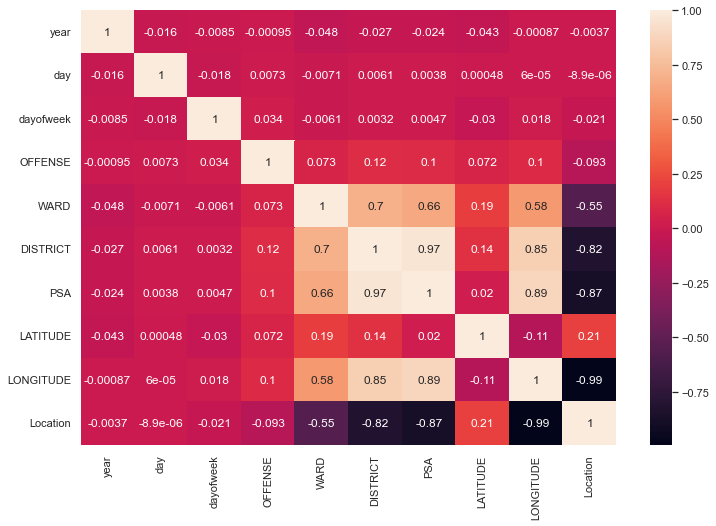

In [142]:
plt.figure(figsize=(12,8))
sns.heatmap(corelation,annot=True)

In [152]:
# month week day have low correlation they do not effect our results so we drop them
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude

selected_cols=['OFFENSE','PSA','LONGITUDE','LATITUDE','year'] 

In [153]:
X=cp_crime[selected_cols]
Y=cp_crime['OFFENSE']

In [154]:
X

,OFFENSE,PSA,LONGITUDE,LATITUDE,year
0,0,7,0.489389,0.047016,2021
1,0,16,0.452772,0.129572,2021
2,3,19,0.475120,0.714055,2021
3,1,18,0.601818,0.785676,2021
4,1,8,0.477239,0.087599,2021
...,...,...,...,...,...
8995,2,27,0.656141,0.053841,2020
8996,1,17,0.607558,0.109678,2020
8997,1,21,0.517414,0.492225,2020
8998,1,18,0.420426,0.917077,2020


In [155]:
from collections import Counter
counter=Counter(Y)

In [156]:
# before oversampling
print(Counter(Y))

Counter({0: 4079, 1: 3286, 2: 1039, 3: 596})


In [157]:
# Total classes
np.unique(Y)

array([0, 1, 2, 3])

In [158]:
from imblearn.over_sampling import SMOTE

In [159]:
# oversampling using SMOTE
oversample= SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [160]:
# After overSampling
print(Counter(Y))

Counter({0: 4079, 3: 4079, 1: 4079, 2: 4079})


In [161]:
X

,OFFENSE,PSA,LONGITUDE,LATITUDE,year
0,0,7,0.489389,0.047016,2021
1,0,16,0.452772,0.129572,2021
2,3,19,0.475120,0.714055,2021
3,1,18,0.601818,0.785676,2021
4,1,8,0.477239,0.087599,2021
...,...,...,...,...,...
16311,3,8,0.441760,0.101952,2020
16312,3,28,0.712588,0.288417,2020
16313,3,11,0.449423,0.343855,2020
16314,3,11,0.454490,0.357023,2020


In [162]:
Y.isna().any(axis=0).sum()


0

In [163]:
# Oversmpling means that the majority class had 1,000 examples and the minority class had 100,
# this strategy would oversampling the minority class so that it has 1,000 examples.
# our majority class has 5815 so after oversampling every class has 5815 entries
# oversampling
# oversample=RandomOverSampler()
# steps = [("o", oversample)]
# # steps = [("u", undersample)]

# pipeline = Pipeline( steps )
# X,Y = pipeline.fit_resample(X,Y)

In [164]:
Y=Y.astype(int)
Y.dtype

dtype('int32')

In [165]:
for c in selected_cols:
    print(f'{c}:{len(cp_crime[c].unique())}')

OFFENSE:4
PSA:34
LONGITUDE:3107
LATITUDE:3107
year:2


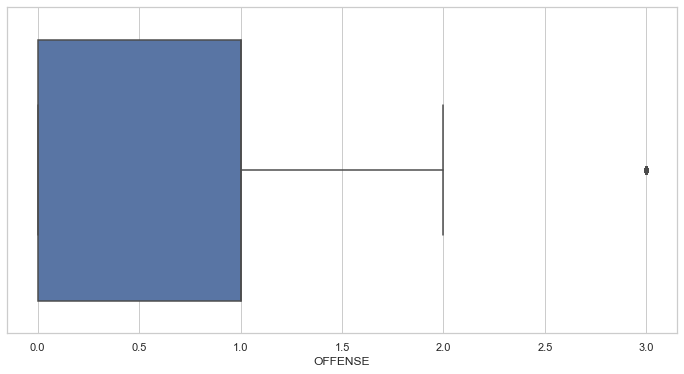

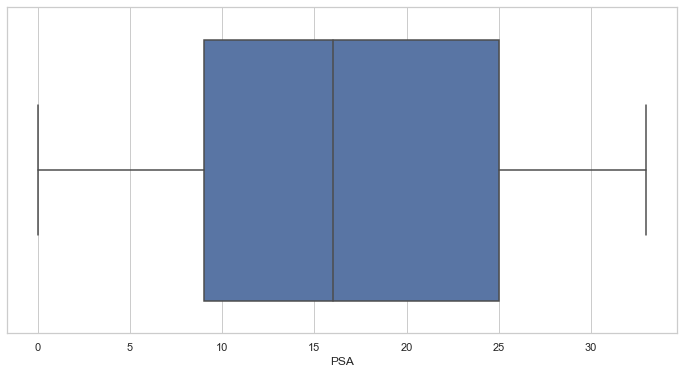

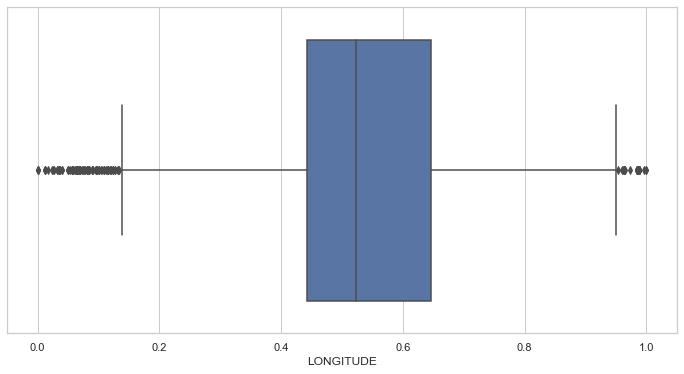

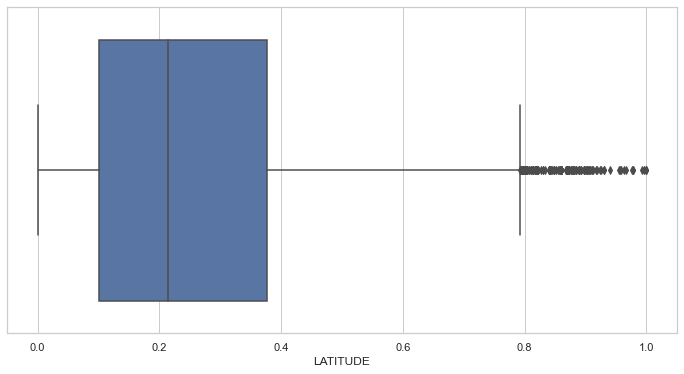

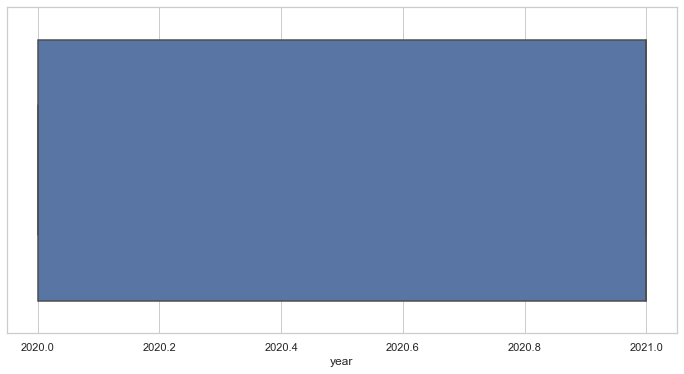

In [166]:
sns.set_theme(style="whitegrid")
#dropping domestic, x coordinate and y coordinate on the basis of correlation map
selected_cols=['OFFENSE','PSA','LONGITUDE','LATITUDE','year']      
sns.boxplot(x=cp_crime['OFFENSE'])
plt.show()
sns.boxplot(x=cp_crime['PSA'])
plt.show()
sns.boxplot(x=cp_crime['LONGITUDE'])
plt.show()
sns.boxplot(x=cp_crime['LATITUDE'])
plt.show()
sns.boxplot(x=cp_crime['year'])
plt.show()

In [167]:
# Tarining and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size = 0.2, random_state=0)

In [168]:
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- XG Boost
# 4- Random Forest
# 5- Knn
# 6- SVM
# 7- Ada Boost
# 8- Decision Tree Classifier (J48)

In [169]:
from sklearn.metrics import classification_report

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [171]:
# para=[{"max_iter":[1,10,100,100]}]
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    }

In [172]:
logreg = LogisticRegression(max_iter=12000,class_weight='balanced')
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=3)                     # number of folds

In [173]:
clf.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=12000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [174]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2'}
Accuracy : 1.0


In [175]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="sag",max_iter=12000,class_weight='balanced',penalty = 'l2',C = 1.0)
lr.fit(X_train, y_train)
pred_labels = lr.predict(X_test)
print('--------------------------------------------------------')
score = lr.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_labels))
# print('Accuracy of Logistic Regression', lr.score(X_test, y_test))

--------------------------------------------------------
Accuracy Score:  1.0
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       818
           1       1.00      1.00      1.00       808
           2       1.00      1.00      1.00       833
           3       1.00      1.00      1.00       805

    accuracy                           1.00      3264
   macro avg       1.00      1.00      1.00      3264
weighted avg       1.00      1.00      1.00      3264



In [176]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_labels = gnb.predict(X_test)

 # Use score method to get accuracy of the model
print('--------------------------------------------------------')
score = gnb.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_labels))
# print('Accuracy of Naive Bayes', gnb.score(X_test, y_test))

--------------------------------------------------------
Accuracy Score:  1.0
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       818
           1       1.00      1.00      1.00       808
           2       1.00      1.00      1.00       833
           3       1.00      1.00      1.00       805

    accuracy                           1.00      3264
   macro avg       1.00      1.00      1.00      3264
weighted avg       1.00      1.00      1.00      3264



In [177]:
error_rate = []

krange = range(1,10,1)
for i in krange:
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights = 'uniform',n_jobs= -1) 
    knn.fit(X_train,y_train)
    predicted_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(' Neighbours  ',i)
    print('Test accuracy ', metrics.accuracy_score(y_train, predicted_train))
    print('Accuracy ', metrics.accuracy_score(y_test, pred_i))

 Neighbours   1
Test accuracy  1.0
Accuracy  1.0
 Neighbours   2
Test accuracy  1.0
Accuracy  1.0
 Neighbours   3
Test accuracy  1.0
Accuracy  1.0
 Neighbours   4
Test accuracy  1.0
Accuracy  1.0
 Neighbours   5
Test accuracy  1.0
Accuracy  1.0
 Neighbours   6
Test accuracy  0.9997701501685565
Accuracy  0.9990808823529411
 Neighbours   7
Test accuracy  0.9998467667790377
Accuracy  0.9990808823529411
 Neighbours   8
Test accuracy  0.9996169169475942
Accuracy  0.9981617647058824
 Neighbours   9
Test accuracy  0.9996935335580754
Accuracy  0.9984681372549019


Text(0, 0.5, 'Error Rate')

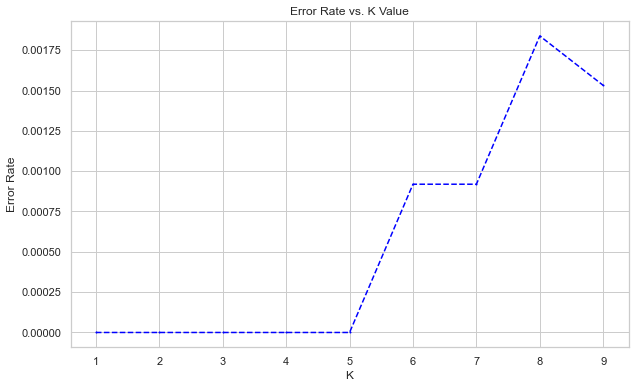

In [178]:
# elbow method to check best amount of neighbours
plt.figure(figsize=(10,6))

plt.plot(krange,error_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# by looking at the figure at 1 error is minimum
# after that at 2 it  increases drastically than show a gradual decrease
# so we chooose K size 1

In [179]:
cp_crime

,year,month,day,dayofweek,SHIFT,OFFENSE,BLOCK,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,LATITUDE,LONGITUDE,Location
0,2021,Feb,15,0,EVENING,0,1100 - 1199 BLOCK OF VERMONT AVENUE NW,0.2,0.000000,7,Cluster 8,Precinct 17,0.047016,0.489389,0.003961
1,2021,Mar,31,2,EVENING,0,1619 - 1699 BLOCK OF 17TH STREET NW,0.2,0.333333,16,Cluster 6,Precinct 15,0.129572,0.452772,0.010910
2,2021,Jan,26,1,DAY,3,1400 - 1599 BLOCK OF SOMERSET PLACE NW,0.6,0.666667,19,Cluster 17,Precinct 60,0.714055,0.475120,0.015471
3,2021,May,30,6,DAY,1,6900 - 6999 BLOCK OF WILLOW STREET NW,0.6,0.666667,18,Cluster 17,Precinct 63,0.785676,0.601818,-0.003620
4,2021,May,31,0,DAY,1,1320 - 1399 BLOCK OF 15TH STREET NW,0.2,0.000000,8,Cluster 7,Precinct 16,0.087599,0.477239,0.006449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2020,Sep,10,3,EVENING,2,1151 - 1199 BLOCK OF 1ST STREET NE,1.0,1.000000,27,Cluster 25,Precinct 144,0.053841,0.656141,-0.022378
8996,2020,Aug,16,6,DAY,1,100 - 299 BLOCK OF BATES STREET NW,0.8,0.333333,17,Cluster 21,Precinct 19,0.109678,0.607558,-0.013902
8997,2020,May,5,1,DAY,1,1100 - 1299 BLOCK OF BUCHANAN STREET NW,0.6,0.666667,21,Cluster 18,Precinct 48,0.492225,0.517414,0.005691
8998,2020,Sep,9,2,DAY,1,1800 - 1849 BLOCK OF PLYMOUTH STREET NW,0.6,0.666667,18,Cluster 16,Precinct 62,0.917077,0.420426,0.026955


Text(0.5, 1.0, 'Crime Types by Month in DC')

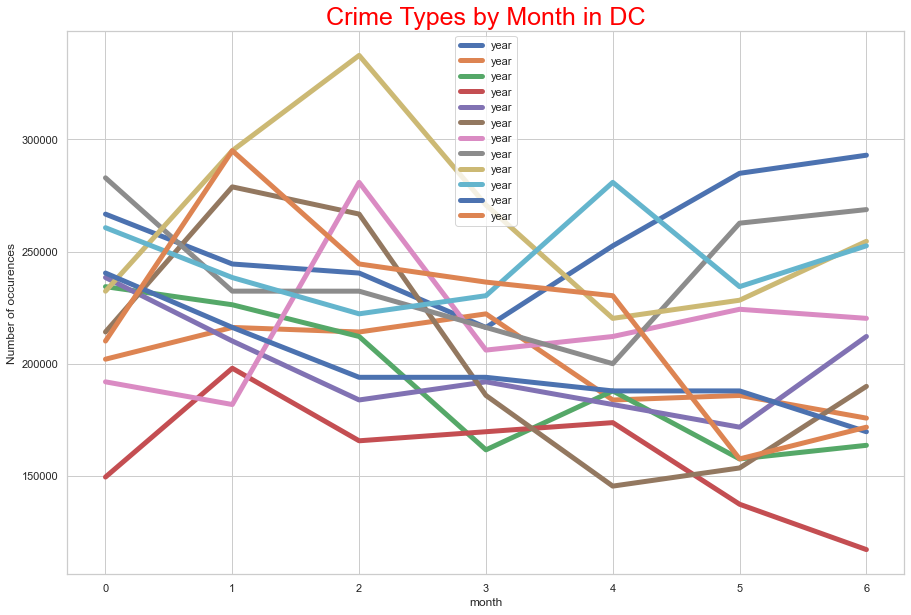

In [185]:
hour_crime_group = cp_crime.groupby(['dayofweek','month'],as_index=False).agg({'year':'sum'})
fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('month').plot(x="dayofweek", y="year", ax=ax,linewidth=5)
ax.set_xlabel('month')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Month in DC',color = 'red',fontsize=25)

In [190]:
df_g0 = df.groupby(['NEIGHBORHOOD_CLUSTER','OFFENSE']).size().to_frame('count').reset_index()
df_g0 = df_g0.pivot(index='NEIGHBORHOOD_CLUSTER',columns='OFFENSE',values='count')
df_g0 = df_g0.dropna()

df_g = df.groupby(['NEIGHBORHOOD_CLUSTER','OFFENSE']).size().to_frame('count').reset_index()
df_g = df_g.pivot(index='NEIGHBORHOOD_CLUSTER',columns='OFFENSE',values='count')
df_g = df_g.dropna()


df_g2 = df.groupby(['NEIGHBORHOOD_CLUSTER','OFFENSE']).size().to_frame('count').reset_index()
df_g2 = df_g2.pivot(index='NEIGHBORHOOD_CLUSTER',columns='OFFENSE',values='count')
df_g2 = df_g2.dropna()

In [191]:
df_g0.head(10)

OFFENSE,0,1,2,3
NEIGHBORHOOD_CLUSTER,,,,
Cluster 1,211.0,101.0,41.0,23.0
Cluster 10,36.0,81.0,8.0,3.0
Cluster 11,132.0,71.0,17.0,6.0
Cluster 12,60.0,39.0,10.0,6.0
Cluster 13,30.0,51.0,13.0,2.0
Cluster 14,66.0,40.0,9.0,2.0
Cluster 15,96.0,68.0,12.0,4.0
Cluster 16,14.0,61.0,8.0,2.0
Cluster 17,142.0,199.0,50.0,37.0


In [192]:
scaler = StandardScaler()
Sum_of_squared_distances0 = []
Sum_of_squared_distances = []
Sum_of_squared_distances2 = []

std_scale = scaler.fit(df_g0)
df_transformed0 = std_scale.transform(df_g0)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed0)
X0 = pca.transform(df_transformed0)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed0)
    Sum_of_squared_distances0.append(km.inertia_)


std_scale = scaler.fit(df_g)
df_transformed = std_scale.transform(df_g)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
    
std_scale = scaler.fit(df_g2)
df_transformed2 = std_scale.transform(df_g2)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed2)
X1 = pca.transform(df_transformed2)

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed2)
    Sum_of_squared_distances2.append(km.inertia_)

NameError: name 'StandardScaler' is not defined

In [193]:
plt.plot(K, Sum_of_squared_distances0, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

NameError: name 'K' is not defined